C:\Users\kalin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


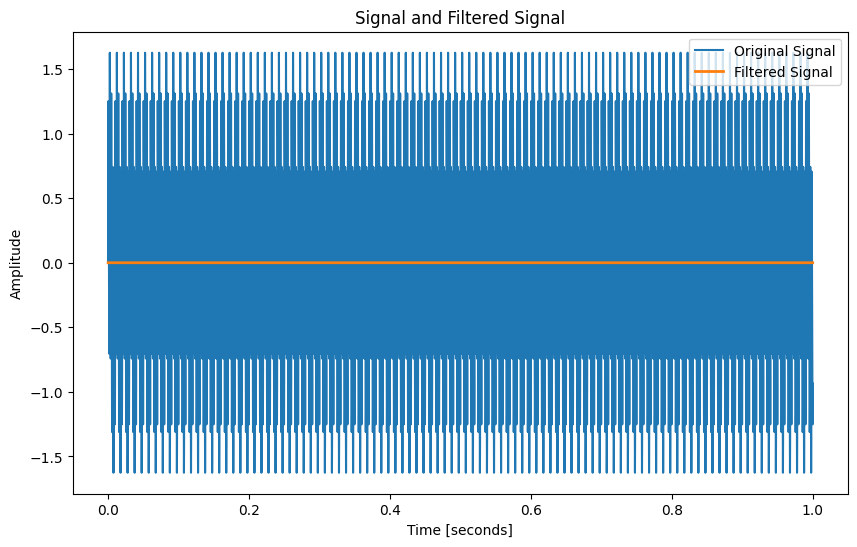

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import bilinear, lfilter

def butterworth_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    omega = np.tan(np.pi * normal_cutoff)
    poles = np.exp(1j * (np.pi/2 + (np.arange(order) * 2 + 1) * np.pi / (2 * order))) * omega
    zeros = np.zeros(order)
    b, a = bilinear(zeros, poles, fs)
    return b, a

def apply_filter(data, cutoff, fs, order=5):
    b, a = butterworth_lowpass(cutoff, fs, order)
    y = lfilter(b, a, data)
    return y

# Create a sample signal with multiple frequencies
fs = 5000  # Sample rate in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
signal = 0.5 * np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 500 * t) + 0.3 * np.sin(2 * np.pi * 1000 * t)

# Apply low-pass filter
cutoff = 300  # Cutoff frequency for low-pass filter in Hz
filtered_signal = apply_filter(signal, cutoff, fs)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.title('Signal and Filtered Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


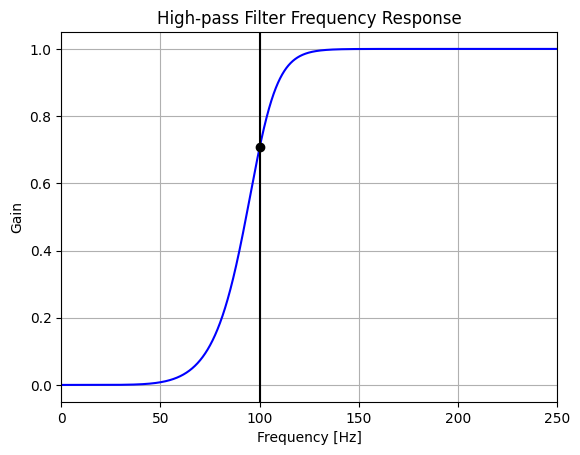

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def butter_highpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=2):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500.0
cutoff = 100.0

# Plot the frequency response.
b, a = butter_highpass(cutoff, fs, order=6)
w, h = freqz(b, a, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("High-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


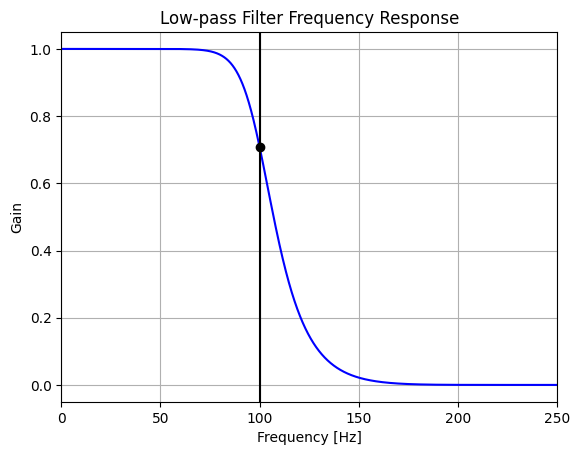

In [7]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500.0
cutoff = 100.0

# Plot the frequency response.
b, a = butter_lowpass(cutoff, fs, order=6)
w, h = freqz(b, a, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Low-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


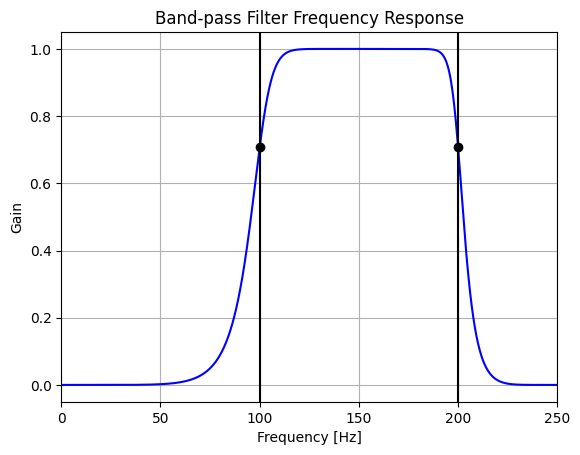

In [8]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500.0
lowcut = 100.0
highcut = 200.0

# Plot the frequency response.
b, a = butter_bandpass(lowcut, highcut, fs, order=6)
w, h = freqz(b, a, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Band-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


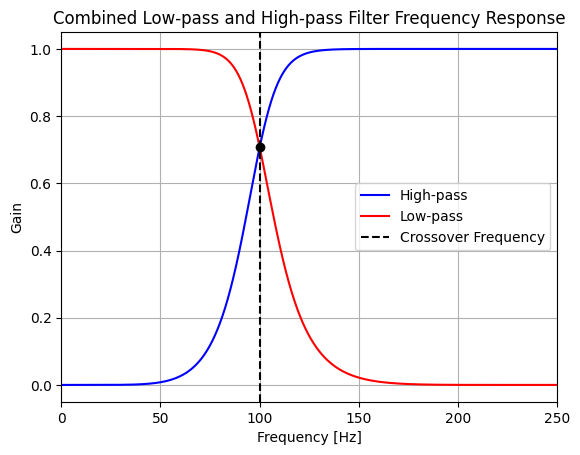

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500.0
cutoff = 100.0

# Plot the frequency response for high-pass filter.
b_high, a_high = butter_highpass(cutoff, fs, order=6)
w_high, h_high = freqz(b_high, a_high, worN=8000)
plt.plot(0.5 * fs * w_high / np.pi, np.abs(h_high), 'b', label='High-pass')

# Plot the frequency response for low-pass filter.
b_low, a_low = butter_lowpass(cutoff, fs, order=6)
w_low, h_low = freqz(b_low, a_low, worN=8000)
plt.plot(0.5 * fs * w_low / np.pi, np.abs(h_low), 'r', label='Low-pass')

# Mark the cutoff frequency
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k', linestyle='--', label='Crossover Frequency')

# Add labels and legend
plt.xlim(0, 0.5*fs)
plt.title("Combined Low-pass and High-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.legend()

# Show the plot
plt.show()


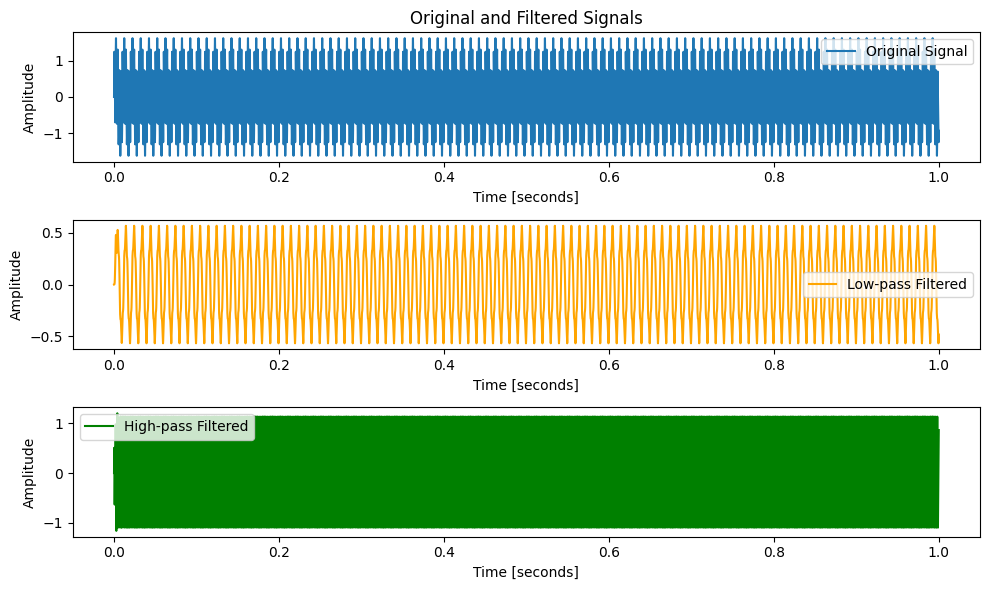

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Function to create a Butterworth filter
def butter_filter(cutoff, fs, btype='low', order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

# Function to apply a filter to a signal
def apply_filter(data, cutoff, fs, btype='low', order=5):
    b, a = butter_filter(cutoff, fs, btype, order)
    y = lfilter(b, a, data)
    return y

# Create a sample signal with multiple frequencies
fs = 5000  # Sample rate in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
signal = 0.5 * np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 500 * t) + 0.3 * np.sin(2 * np.pi * 1000 * t)

# Apply low-pass filter
cutoff_low = 300  # Cutoff frequency for low-pass filter in Hz
filtered_low = apply_filter(signal, cutoff_low, fs, 'low')

# Apply high-pass filter
cutoff_high = 300  # Cutoff frequency for high-pass filter in Hz
filtered_high = apply_filter(signal, cutoff_high, fs, 'high')

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original and Filtered Signals')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, filtered_low, label='Low-pass Filtered', color='orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_high, label='High-pass Filtered', color='green')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


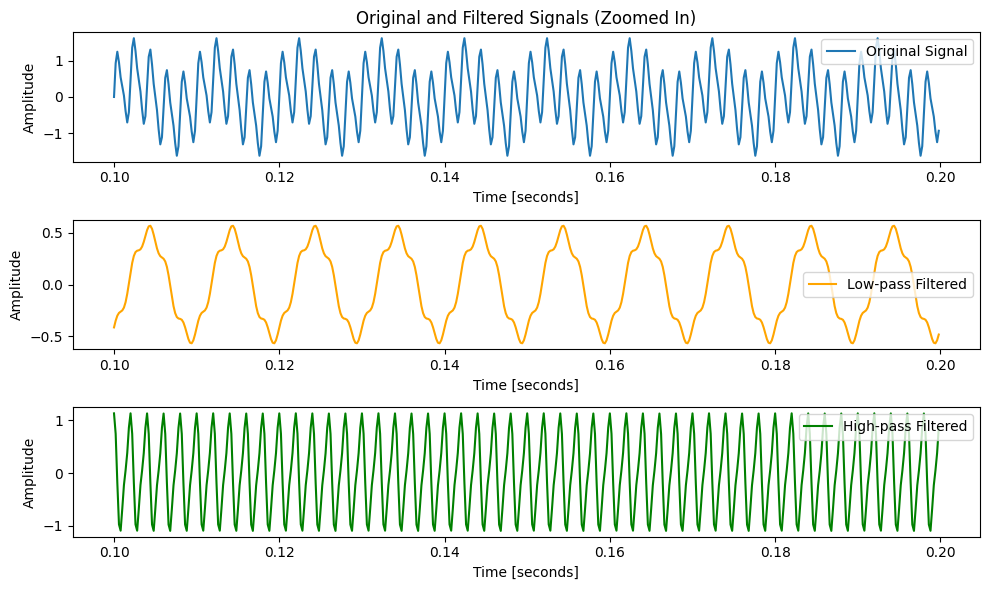

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Function to create a Butterworth filter
def butter_filter(cutoff, fs, btype='low', order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

# Function to apply a filter to a signal
def apply_filter(data, cutoff, fs, btype='low', order=5):
    b, a = butter_filter(cutoff, fs, btype, order)
    y = lfilter(b, a, data)
    return y

# Create a sample signal with multiple frequencies
fs = 5000  # Sample rate in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
signal = 0.5 * np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 500 * t) + 0.3 * np.sin(2 * np.pi * 1000 * t)

# Apply low-pass filter
cutoff_low = 300  # Cutoff frequency for low-pass filter in Hz
filtered_low = apply_filter(signal, cutoff_low, fs, 'low')

# Apply high-pass filter
cutoff_high = 300  # Cutoff frequency for high-pass filter in Hz
filtered_high = apply_filter(signal, cutoff_high, fs, 'high')

# Zoom in on a specific time range
start, end = 0.1, 0.2
start_idx, end_idx = int(start * fs), int(end * fs)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t[start_idx:end_idx], signal[start_idx:end_idx], label='Original Signal')
plt.title('Original and Filtered Signals (Zoomed In)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[start_idx:end_idx], filtered_low[start_idx:end_idx], label='Low-pass Filtered', color='orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[start_idx:end_idx], filtered_high[start_idx:end_idx], label='High-pass Filtered', color='green')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
